In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline
pd.options.display.max_rows = 15

In [2]:
print('adasdsad')

adasdsad


In [3]:
original = pd.read_csv('data/lol-simple/games.csv', index_col=['gameId'])
original

,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,...,5,0,0,1,1,114,67,43,16,51
3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,...,2,0,0,0,0,11,67,238,51,420
3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,...,2,0,0,1,0,157,238,121,57,28
3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,...,0,0,0,0,0,164,18,141,40,51
3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,...,3,0,0,1,0,86,11,201,122,18
3287435705,1501667992132,2059,9,1,2,2,1,1,2,0,...,6,0,0,3,0,119,134,154,63,31
3314215542,1503430065724,1993,9,1,1,2,1,1,1,1,...,2,0,0,0,0,75,42,31,40,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328393516,1504448939147,1674,9,2,2,1,2,2,1,0,...,10,2,1,1,0,-1,412,19,40,29


In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51490 entries, 3326086514 to 3317333020
Data columns (total 60 columns):
creationTime          51490 non-null int64
gameDuration          51490 non-null int64
seasonId              51490 non-null int64
winner                51490 non-null int64
firstBlood            51490 non-null int64
firstTower            51490 non-null int64
firstInhibitor        51490 non-null int64
firstBaron            51490 non-null int64
firstDragon           51490 non-null int64
firstRiftHerald       51490 non-null int64
t1_champ1id           51490 non-null int64
t1_champ1_sum1        51490 non-null int64
t1_champ1_sum2        51490 non-null int64
t1_champ2id           51490 non-null int64
t1_champ2_sum1        51490 non-null int64
t1_champ2_sum2        51490 non-null int64
t1_champ3id           51490 non-null int64
t1_champ3_sum1        51490 non-null int64
t1_champ3_sum2        51490 non-null int64
t1_champ4id           51490 non-null int64
t1_champ4_sum1   

In [5]:
len(original[original.seasonId == 9])

51490

In [6]:
data = original.drop('creationTime', axis=1).drop('seasonId', axis=1)

In [7]:
data['gameDuration'] = (data['gameDuration']/60)

In [8]:
print('Average game time: ', data['gameDuration'].mean()) 

Average game time:  30.5393801385


In [9]:
data.describe()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,30.539380,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,0.731676,114.293397,6.601787,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,8.533628,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,0.822526,119.000867,4.025601,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.166667,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,25.516667,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,35.000000,4.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,30.550000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,79.000000,4.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,35.800000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,136.000000,11.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,78.800000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,516.000000,21.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [10]:
x = data.drop('winner', axis=1)
x

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,32.483333,2,1,1,1,1,2,8,12,4,...,5,0,0,1,1,114,67,43,16,51
3229566029,30.850000,1,1,1,0,1,1,119,7,4,...,2,0,0,0,0,11,67,238,51,420
3327363504,24.883333,2,1,1,1,2,0,18,4,7,...,2,0,0,1,0,157,238,121,57,28
3326856598,29.300000,1,1,1,1,1,0,57,4,12,...,0,0,0,0,0,164,18,141,40,51
3330080762,34.900000,2,1,1,1,1,0,19,4,12,...,3,0,0,1,0,86,11,201,122,18
3287435705,34.316667,2,2,1,1,2,0,40,3,4,...,6,0,0,3,0,119,134,154,63,31
3314215542,33.216667,1,2,1,1,1,1,74,3,4,...,2,0,0,0,0,75,42,31,40,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328393516,27.900000,2,1,2,2,1,0,91,14,4,...,10,2,1,1,0,-1,412,19,40,29


In [11]:
y = data['winner']
y

gameId
3326086514    1
3229566029    1
3327363504    1
3326856598    1
3330080762    1
3287435705    1
3314215542    1
             ..
3328393516    2
3316694929    2
3308904636    2
3215685759    2
3322765040    2
3256675373    2
3317333020    1
Name: winner, Length: 51490, dtype: int64

In [12]:
y.value_counts()

1    26077
2    25413
Name: winner, dtype: int64

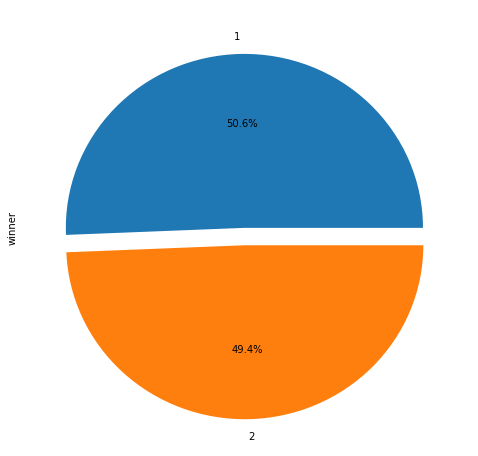

In [13]:
y.value_counts().plot(kind='pie', explode=[0, 0.1], figsize=(8,8), autopct='%1.1f%%')

In [14]:
data.loc[data.winner == 1, 'winner'] = 'blue'
data.loc[data.winner == 2, 'winner'] = 'red'
data

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,32.483333,blue,2,1,1,1,1,2,8,12,...,5,0,0,1,1,114,67,43,16,51
3229566029,30.850000,blue,1,1,1,0,1,1,119,7,...,2,0,0,0,0,11,67,238,51,420
3327363504,24.883333,blue,2,1,1,1,2,0,18,4,...,2,0,0,1,0,157,238,121,57,28
3326856598,29.300000,blue,1,1,1,1,1,0,57,4,...,0,0,0,0,0,164,18,141,40,51
3330080762,34.900000,blue,2,1,1,1,1,0,19,4,...,3,0,0,1,0,86,11,201,122,18
3287435705,34.316667,blue,2,2,1,1,2,0,40,3,...,6,0,0,3,0,119,134,154,63,31
3314215542,33.216667,blue,1,2,1,1,1,1,74,3,...,2,0,0,0,0,75,42,31,40,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328393516,27.900000,red,2,1,2,2,1,0,91,14,...,10,2,1,1,0,-1,412,19,40,29


In [15]:
data['IsBlueTeamWinner'] = (data.winner == 'blue').astype(float)
data['IsRedTeamWinner'] = (data.winner == 'red').astype(float)
data

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,IsBlueTeamWinner,IsRedTeamWinner
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,32.483333,blue,2,1,1,1,1,2,8,12,...,0,1,1,114,67,43,16,51,1.0,0.0
3229566029,30.850000,blue,1,1,1,0,1,1,119,7,...,0,0,0,11,67,238,51,420,1.0,0.0
3327363504,24.883333,blue,2,1,1,1,2,0,18,4,...,0,1,0,157,238,121,57,28,1.0,0.0
3326856598,29.300000,blue,1,1,1,1,1,0,57,4,...,0,0,0,164,18,141,40,51,1.0,0.0
3330080762,34.900000,blue,2,1,1,1,1,0,19,4,...,0,1,0,86,11,201,122,18,1.0,0.0
3287435705,34.316667,blue,2,2,1,1,2,0,40,3,...,0,3,0,119,134,154,63,31,1.0,0.0
3314215542,33.216667,blue,1,2,1,1,1,1,74,3,...,0,0,0,75,42,31,40,429,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328393516,27.900000,red,2,1,2,2,1,0,91,14,...,1,1,0,-1,412,19,40,29,0.0,1.0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = original.drop('creationTime', axis=1).drop('seasonId', axis=1).drop('winner', axis=1)
Y = original['winner']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=0, stratify=y) 

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.963461687858
test score:  0.959527693622


In [20]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

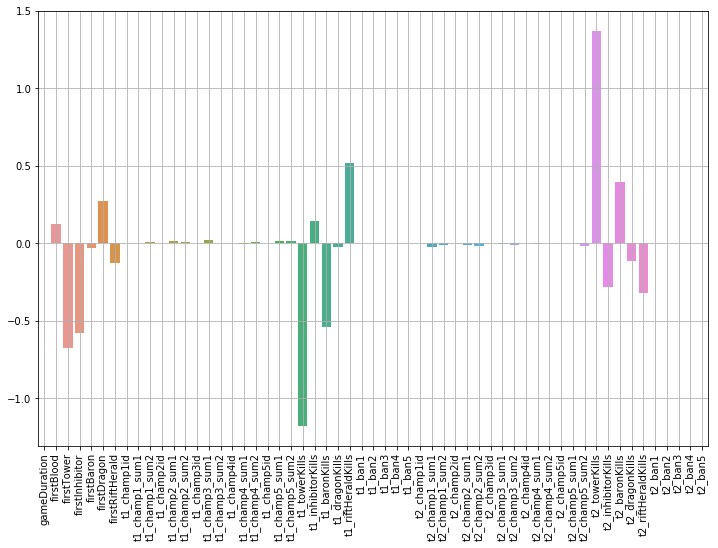

In [21]:
logistic_regression_features(X, model)
# actual data from the game determines the winner the most
# going to try to predict the winner only by the picks and bans

In [22]:
X2 = original[['t1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_ban1',
              't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_ban2',
              't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_ban3',
              't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_ban4',
              't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_ban5',
              't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_ban1',
              't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_ban2',
              't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_ban3',
              't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_ban4',
              't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_ban5']]
Y2 = original['winner']
X2.describe()

,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_ban1,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_ban2,t1_champ3id,t1_champ3_sum1,...,t2_champ3_sum2,t2_ban3,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_ban4,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_ban5
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,114.293397,6.601787,7.333929,108.319713,118.101631,6.547796,7.198213,108.786094,116.905127,6.542280,...,7.227384,108.690581,118.185881,6.535424,7.201476,108.626044,115.941853,6.612682,7.249680,108.066576
std,119.000867,4.025601,4.299902,102.247492,123.577538,3.980675,4.224076,102.942617,122.653184,3.966289,...,4.242333,102.592145,124.002327,3.963142,4.235044,103.346952,122.015086,4.013472,4.253408,102.756149
min,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,...,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000
25%,35.000000,4.000000,4.000000,38.000000,35.000000,4.000000,4.000000,38.000000,35.000000,4.000000,...,4.000000,38.000000,35.000000,4.000000,4.000000,38.000000,35.000000,4.000000,4.000000,38.000000
50%,79.000000,4.000000,4.000000,90.000000,79.000000,4.000000,4.000000,90.000000,78.000000,4.000000,...,4.000000,90.000000,79.000000,4.000000,4.000000,90.000000,78.000000,4.000000,4.000000,90.000000
75%,136.000000,11.000000,11.000000,141.000000,141.000000,11.000000,11.000000,141.000000,141.000000,11.000000,...,11.000000,141.000000,141.000000,11.000000,11.000000,141.000000,141.000000,11.000000,11.000000,141.000000
max,516.000000,21.000000,21.000000,516.000000,516.000000,21.000000,21.000000,516.000000,516.000000,21.000000,...,21.000000,516.000000,516.000000,21.000000,21.000000,516.000000,516.000000,21.000000,21.000000,516.000000


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X2,Y2, random_state=0, stratify=y)

In [24]:
model = LogisticRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.523603594272
test score:  0.5266837567


In [25]:
original['firstBlood'].describe()

count    51490.000000
mean         1.471295
std          0.520326
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: firstBlood, dtype: float64

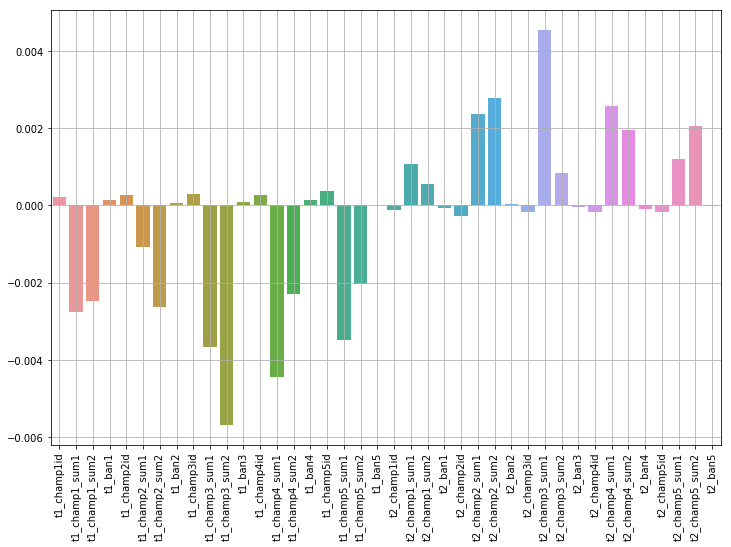

In [26]:
logistic_regression_features(X2, model)

In [27]:
X3 = original[['t1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
              't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 
              't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 
              't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 
              't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 
              't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 
              't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 
              't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 
              't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 
              't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2']]
X3.describe()

,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,...,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,114.293397,6.601787,7.333929,118.101631,6.547796,7.198213,116.905127,6.542280,7.200602,117.657953,...,7.230627,117.481103,6.521849,7.227384,118.185881,6.535424,7.201476,115.941853,6.612682,7.249680
std,119.000867,4.025601,4.299902,123.577538,3.980675,4.224076,122.653184,3.966289,4.243279,123.354082,...,4.256462,122.939051,3.960422,4.242333,124.002327,3.963142,4.235044,122.015086,4.013472,4.253408
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,4.000000,4.000000,35.000000,4.000000,4.000000,35.000000,4.000000,4.000000,36.000000,...,4.000000,36.000000,4.000000,4.000000,35.000000,4.000000,4.000000,35.000000,4.000000,4.000000
50%,79.000000,4.000000,4.000000,79.000000,4.000000,4.000000,78.000000,4.000000,4.000000,79.000000,...,4.000000,79.000000,4.000000,4.000000,79.000000,4.000000,4.000000,78.000000,4.000000,4.000000
75%,136.000000,11.000000,11.000000,141.000000,11.000000,11.000000,141.000000,11.000000,11.000000,141.000000,...,11.000000,141.000000,11.000000,11.000000,141.000000,11.000000,11.000000,141.000000,11.000000,11.000000
max,516.000000,21.000000,21.000000,516.000000,21.000000,21.000000,516.000000,21.000000,21.000000,516.000000,...,21.000000,516.000000,21.000000,21.000000,516.000000,21.000000,21.000000,516.000000,21.000000,21.000000


In [28]:
X3.t1_champ1id.value_counts()

18     1299
412    1182
67     1030
141    1006
64      906
29      862
40      852
       ... 
127     116
13      114
30       98
266      96
136      84
427      80
72       63
Name: t1_champ1id, Length: 138, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X3,Y, random_state=0, stratify=y)

In [30]:
model = LogisticRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.52091047984
test score:  0.52637302882


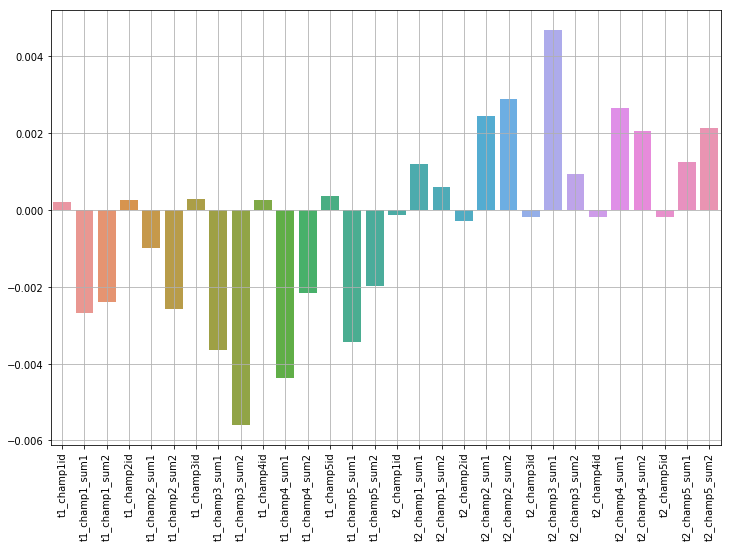

In [31]:
logistic_regression_features(X3, model)

In [32]:
X4 = pd.DataFrame()
#X4['t1_p1_isChampId' + str(champId)] =
for champId in range(1,516):
    print((X3['t1_champ1id'] == champId).astype(float))

gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0

Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    1.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Len

Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Len

gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0

gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0.0
3229566029    0.0
3327363504    0.0
3326856598    0.0
3330080762    0.0
3287435705    0.0
3314215542    0.0
             ... 
3328393516    0.0
3316694929    0.0
3308904636    0.0
3215685759    0.0
3322765040    0.0
3256675373    0.0
3317333020    0.0
Name: t1_champ1id, Length: 51490, dtype: float64
gameId
3326086514    0

In [33]:
p = pd.DataFrame({'IsT1Winner': (original['winner'] == 1).astype(float)*100})
p

,IsT1Winner
gameId,
3326086514,100.0
3229566029,100.0
3327363504,100.0
3326856598,100.0
3330080762,100.0
3287435705,100.0
3314215542,100.0
...,...
3328393516,0.0


In [34]:
for teamId in range(1,3):
    for playerId in range(1,6):
        for champId in range(1,517):
            p['t' + str(teamId) +
              '_p' + str(playerId) +
              '_isChampId' +  str(champId)] = (original['t' + str(teamId) + '_champ' + str(playerId) + 'id'] == champId).astype(float)

In [35]:
p.describe()

,IsT1Winner,t1_p1_isChampId1,t1_p1_isChampId2,t1_p1_isChampId3,t1_p1_isChampId4,t1_p1_isChampId5,t1_p1_isChampId6,t1_p1_isChampId7,t1_p1_isChampId8,t1_p1_isChampId9,...,t2_p5_isChampId507,t2_p5_isChampId508,t2_p5_isChampId509,t2_p5_isChampId510,t2_p5_isChampId511,t2_p5_isChampId512,t2_p5_isChampId513,t2_p5_isChampId514,t2_p5_isChampId515,t2_p5_isChampId516
count,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.0,51490.0,51490.0,51490.0,51490.0,51490.0,51490.0,51490.0,51490.0,51490.000000
mean,50.644785,0.006215,0.003399,0.006040,0.006914,0.006584,0.004545,0.004525,0.006176,0.003515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009361
std,49.996328,0.078589,0.058200,0.077483,0.082863,0.080874,0.067261,0.067118,0.078345,0.059186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [36]:
px = p.drop('IsT1Winner', axis=1)
py = p['IsT1Winner']
px

,t1_p1_isChampId1,t1_p1_isChampId2,t1_p1_isChampId3,t1_p1_isChampId4,t1_p1_isChampId5,t1_p1_isChampId6,t1_p1_isChampId7,t1_p1_isChampId8,t1_p1_isChampId9,t1_p1_isChampId10,...,t2_p5_isChampId507,t2_p5_isChampId508,t2_p5_isChampId509,t2_p5_isChampId510,t2_p5_isChampId511,t2_p5_isChampId512,t2_p5_isChampId513,t2_p5_isChampId514,t2_p5_isChampId515,t2_p5_isChampId516
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3229566029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3327363504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3326856598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3330080762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3287435705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3314215542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328393516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x_train, x_test, y_train, y_test = train_test_split(px,py, random_state=0, stratify=y)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: -0.00366715012346
test score:  -0.081161718876


In [38]:
model.coef_

array([[ 0.07084661, -0.3723125 , -0.24946371, ...,  0.        ,
         0.        ,  0.21756664]])

In [39]:
px.columns[1:10]

Index(['t1_p1_isChampId2', 't1_p1_isChampId3', 't1_p1_isChampId4',
       't1_p1_isChampId5', 't1_p1_isChampId6', 't1_p1_isChampId7',
       't1_p1_isChampId8', 't1_p1_isChampId9', 't1_p1_isChampId10'],
      dtype='object')

In [44]:
def logistic_regression_features_part_of_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns[517:537], y=model.coef_[0][517:537], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

In [45]:
logistic_regression_features_part_of_features(px, model)

IndexError: invalid index to scalar variable.

In [42]:
games = pd.DataFrame([])
# have to populate single row with 5160 values corresponding to having the champ or not
# first initializing with 0
for teamId in range(1,3):
    for playerId in range(1,6):
        for champId in range(1,517):
            games['t' + str(teamId) +
              '_p' + str(playerId) +
              '_isChampId' +  str(champId)] = [0.0]

# setting ones
for teamId in range(2,3):
    for playerId in range(1,6):
            games['t' + str(teamId) +
              '_p' + str(playerId) +
              '_isChampId' +  str(13)] = 1.0
games

,t1_p1_isChampId1,t1_p1_isChampId2,t1_p1_isChampId3,t1_p1_isChampId4,t1_p1_isChampId5,t1_p1_isChampId6,t1_p1_isChampId7,t1_p1_isChampId8,t1_p1_isChampId9,t1_p1_isChampId10,...,t2_p5_isChampId507,t2_p5_isChampId508,t2_p5_isChampId509,t2_p5_isChampId510,t2_p5_isChampId511,t2_p5_isChampId512,t2_p5_isChampId513,t2_p5_isChampId514,t2_p5_isChampId515,t2_p5_isChampId516
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
for teamId in range(1,2):
    for playerId in range(1,6):
            games['t' + str(teamId) +
              '_p' + str(playerId) +
              '_isChampId' +  str(2)] = 1.0

In [126]:
model.predict(games)

array([ 100.])